<a href="https://colab.research.google.com/github/oladimejiadaramoye/Loan_approval_model/blob/main/loan_approval_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Project to predict loan approval

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the train dataset to train our model
# The dataset contains various features related to loan applicants and whether their loan was approved or not
data = pd.read_csv('train_Data.csv')

In [3]:
# Displaying the first few rows of the dataset to understand its structure
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# heck for duplicates
data.duplicated().sum()

0

In [7]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

### Exploratory data analysis


<Axes: xlabel='Loan_Status', ylabel='count'>

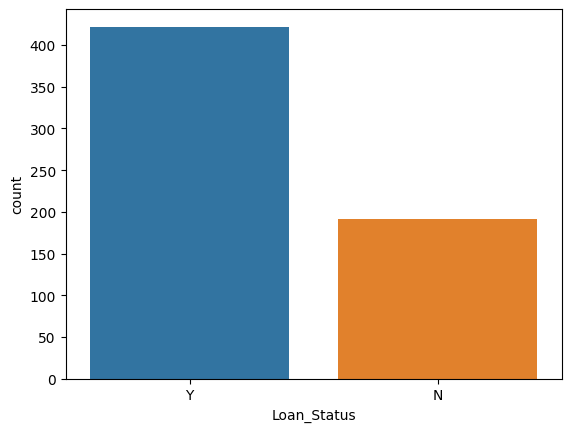

In [9]:
sns.countplot(x='Loan_Status', data=data,hue='Loan_Status')

In [10]:
data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

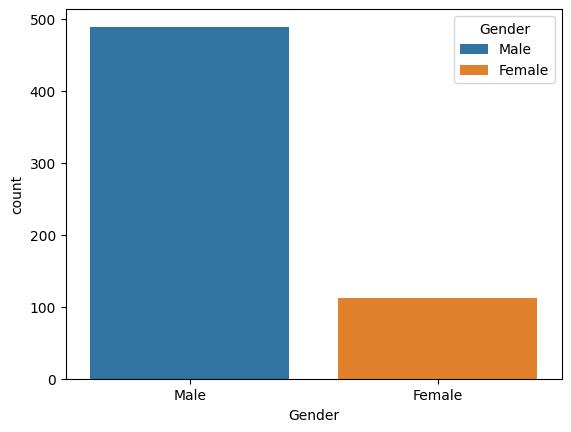

In [11]:
sns.countplot(x='Gender', data=data, hue='Gender')

In [12]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

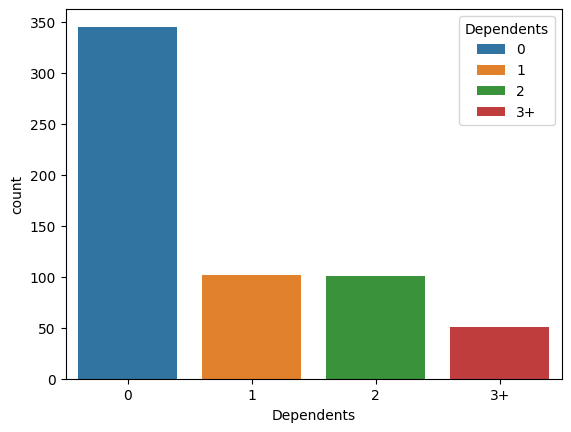

In [13]:
sns.countplot(x='Dependents',data=data,hue='Dependents')

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

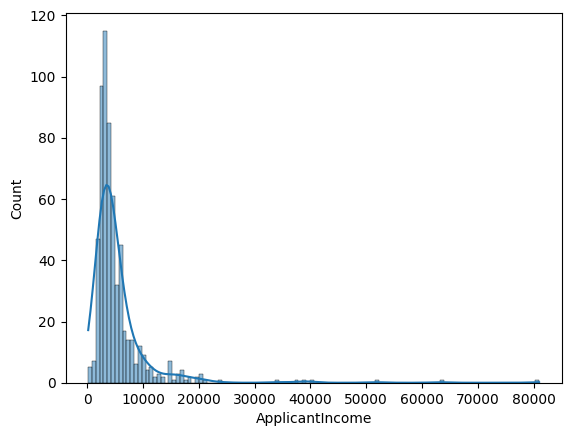

In [14]:
sns.histplot(data['ApplicantIncome'],kde=True)

<Axes: xlabel='LoanAmount', ylabel='Count'>

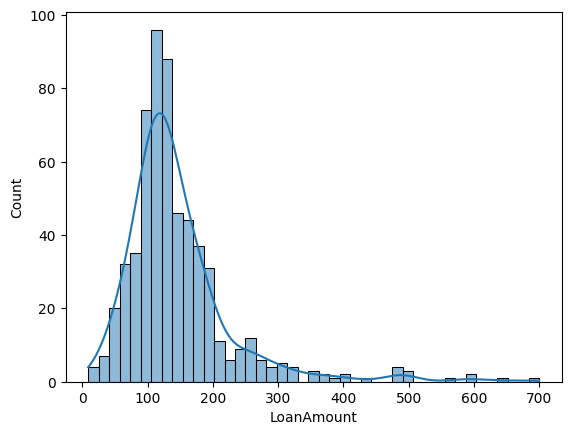

In [15]:
sns.histplot(data['LoanAmount'],kde=True)

<Axes: xlabel='Credit_History', ylabel='Count'>

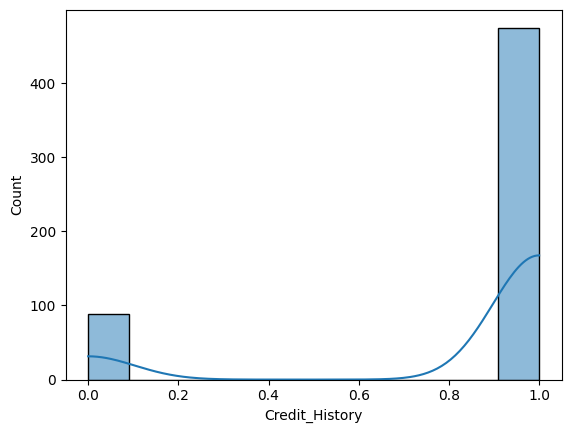

In [16]:
sns.histplot(data['Credit_History'],kde=True)

In [17]:
data['LoanAmount'].value_counts()

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

<Axes: xlabel='LoanAmount', ylabel='count'>

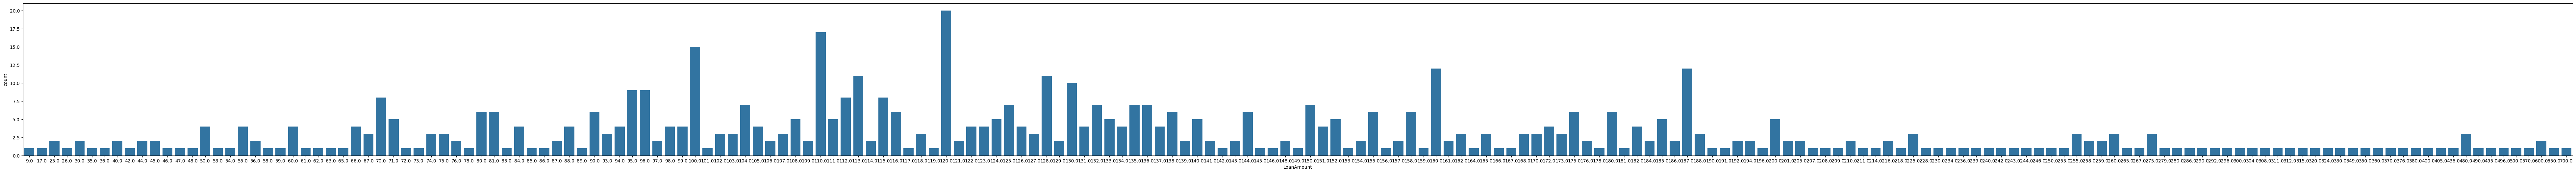

In [18]:
plt.figure(figsize=(100,6))
sns.countplot(x='LoanAmount',data=data)

In [19]:
pd.crosstab(data['Gender'],data['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


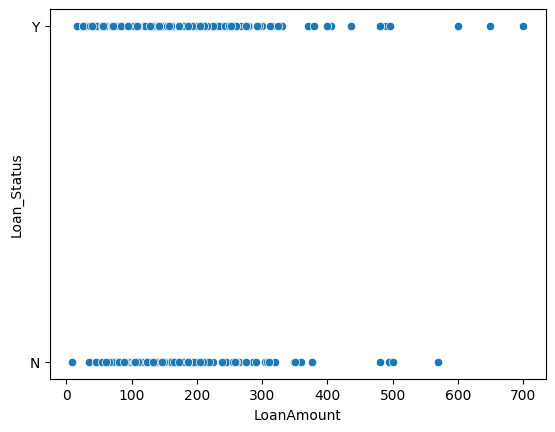

In [20]:
# prompt: plot scatterplot between loan status and loan amount

import matplotlib.pyplot as plt
sns.scatterplot(x='LoanAmount', y='Loan_Status', data=data)
plt.show()


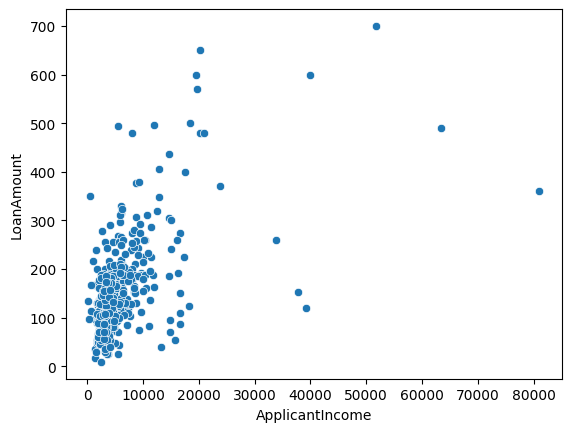

In [21]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=data)
plt.show()


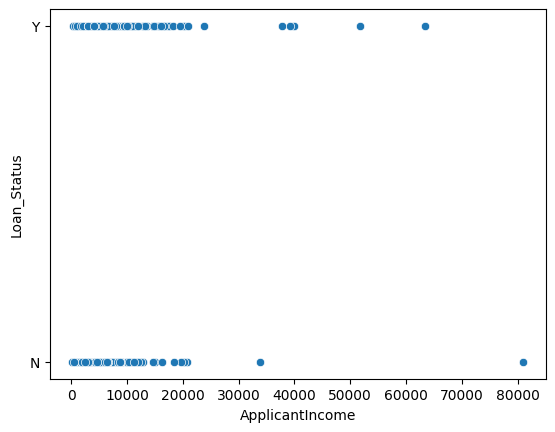

In [22]:
sns.scatterplot(x='ApplicantIncome', y='Loan_Status', data=data)
plt.show()

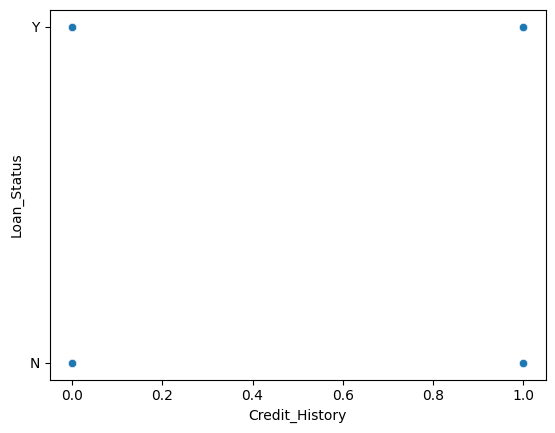

In [23]:
sns.scatterplot(x='Credit_History', y='Loan_Status', data=data)
plt.show()

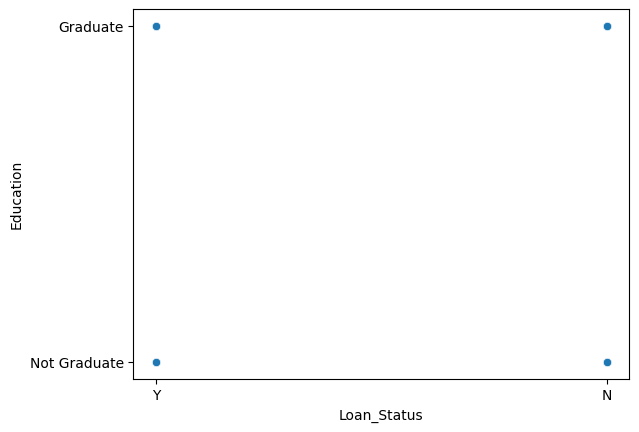

In [24]:
sns.scatterplot(x='Loan_Status', y='Education', data=data)
plt.show()

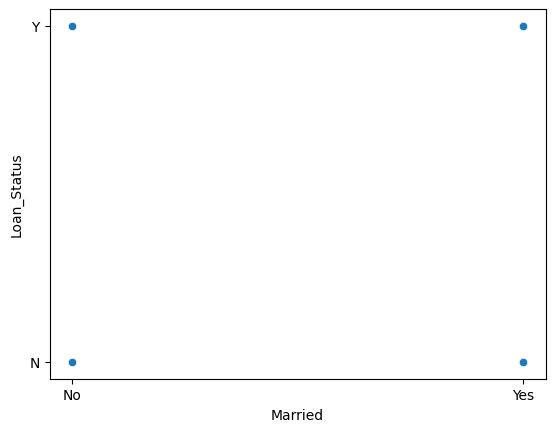

In [25]:
sns.scatterplot(x='Married', y='Loan_Status', data=data)
plt.show()

In [26]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [27]:
# Encoding categorical variables
# Converting categorical variables into numerical format for model compatibility

replace = pd.get_dummies(data,columns=['Gender',"Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"])

In [28]:
replace.dtypes

Loan_ID                     object
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Female                 bool
Gender_Male                   bool
Married_No                    bool
Married_Yes                   bool
Dependents_0                  bool
Dependents_1                  bool
Dependents_2                  bool
Dependents_3+                 bool
Education_Graduate            bool
Education_Not Graduate        bool
Self_Employed_No              bool
Self_Employed_Yes             bool
Property_Area_Rural           bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
Loan_Status_N                 bool
Loan_Status_Y                 bool
dtype: object

In [29]:
replace.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,LP001002,5849,0.0,NaN,360.0,1.0,False,True,True,False,...,False,True,False,True,False,False,False,True,False,True
1,LP001003,4583,1508.0,128.0,360.0,1.0,False,True,False,True,...,False,True,False,True,False,True,False,False,True,False
2,LP001005,3000,0.0,66.0,360.0,1.0,False,True,False,True,...,False,True,False,False,True,False,False,True,False,True
3,LP001006,2583,2358.0,120.0,360.0,1.0,False,True,False,True,...,False,False,True,True,False,False,False,True,False,True
4,LP001008,6000,0.0,141.0,360.0,1.0,False,True,True,False,...,False,True,False,True,False,False,False,True,False,True


In [30]:
replace.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')

In [31]:
columns_convert=['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status_N', 'Loan_Status_Y']

In [32]:
#convert boolean values to integer
replace[columns_convert]=replace[columns_convert].astype(int)

In [33]:
replace.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,LP001002,5849,0.0,NaN,360.0,1.0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
2,LP001005,3000,0.0,66.0,360.0,1.0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,0,1,0,1,...,0,0,1,1,0,0,0,1,0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1


In [34]:
replace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               592 non-null    float64
 4   Loan_Amount_Term         600 non-null    float64
 5   Credit_History           564 non-null    float64
 6   Gender_Female            614 non-null    int64  
 7   Gender_Male              614 non-null    int64  
 8   Married_No               614 non-null    int64  
 9   Married_Yes              614 non-null    int64  
 10  Dependents_0             614 non-null    int64  
 11  Dependents_1             614 non-null    int64  
 12  Dependents_2             614 non-null    int64  
 13  Dependents_3+            614 non-null    int64  
 14  Education_Graduate       6

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
lab_end = LabelEncoder()

In [37]:
columns =['Gender',"Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]

data[columns] = data[columns].apply(lab_end.fit_transform)

In [38]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [39]:
# drop loan ID
data.drop(["Loan_ID"],inplace = True, axis=1)

In [40]:
# Checking for any missing values in the dataset
# This step is crucial to ensure data quality and handle any missing values appropriately
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

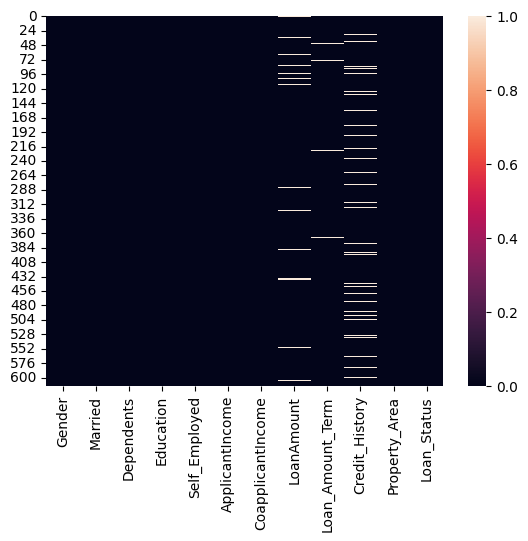

In [41]:
sns.heatmap(data.isnull())

In [42]:
# Filling missing values with the mean of the column
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [43]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True)

In [44]:
data['Credit_History'].fillna(data['Credit_History'].mean(),inplace=True)

In [45]:
# Verifying that there are no more missing values

data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Check for outliers

<Axes: ylabel='ApplicantIncome'>

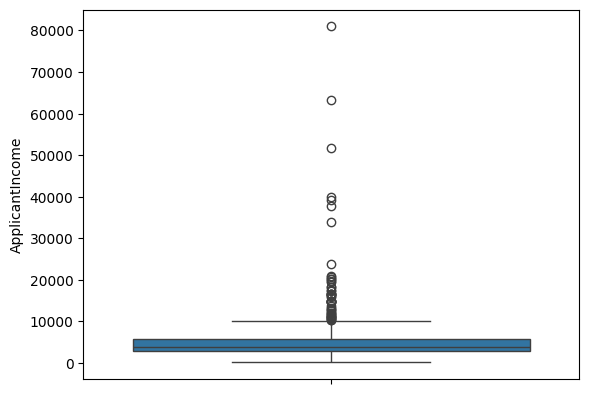

In [46]:
sns.boxplot(data['ApplicantIncome'])

In [47]:
Q1 = data["ApplicantIncome"].quantile(0.25)
Q3 = data["ApplicantIncome"].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data.loc[data["ApplicantIncome"] > upper,"ApplicantIncome"] = upper

<Axes: ylabel='ApplicantIncome'>

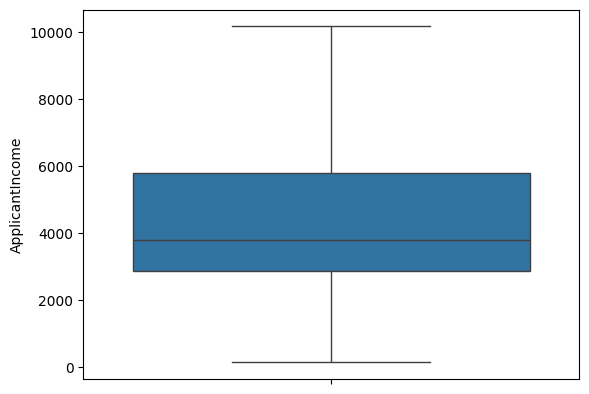

In [48]:
sns.boxplot(data['ApplicantIncome'])

<Axes: ylabel='LoanAmount'>

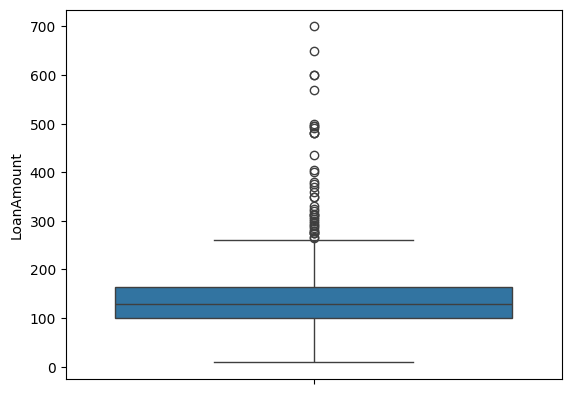

In [49]:
sns.boxplot(data['LoanAmount'])

In [50]:
Q1 = data["LoanAmount"].quantile(0.25)
Q3 = data["LoanAmount"].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data.loc[data["LoanAmount"] > upper,"LoanAmount"] = upper

<Axes: ylabel='LoanAmount'>

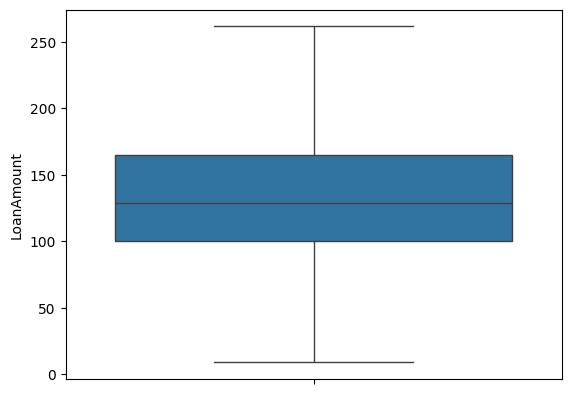

In [51]:
sns.boxplot(data['LoanAmount'])

<Axes: ylabel='CoapplicantIncome'>

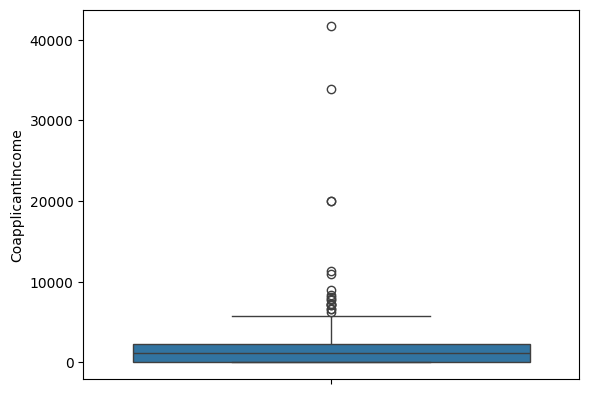

In [52]:
sns.boxplot(data['CoapplicantIncome'])

In [53]:
Q1 = data["CoapplicantIncome"].quantile(0.25)
Q3 = data["CoapplicantIncome"].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data.loc[data["CoapplicantIncome"] > upper,"CoapplicantIncome"] = upper

<Axes: ylabel='CoapplicantIncome'>

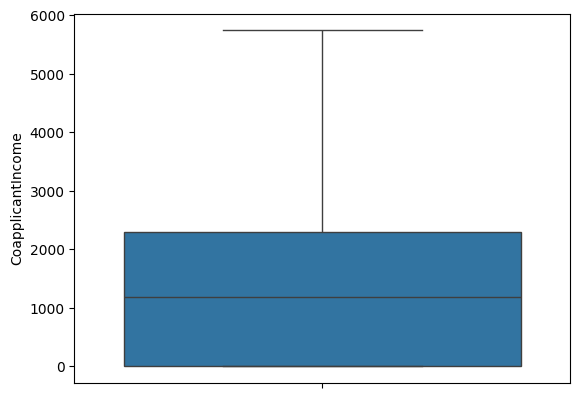

In [54]:
sns.boxplot(data['CoapplicantIncome'])

In [55]:
# seprating the data in x and y
# Defining the feature matrix X and the target variable y
# X contains all the features except the target variable 'Loan_Status'
# y contains the target variable 'Loan_Status'
x = data.drop(columns = "Loan_Status", axis = 1)
y = data["Loan_Status"]

In [56]:
# Splitting the dataset into training and testing sets
# This step helps to evaluate the model's performance on unseen data
from sklearn.model_selection import train_test_split

In [57]:
#Train the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=131, stratify=y)

In [59]:
# Feature scaling
# Standardizing the feature values to have zero mean and unit variance
# This step is essential for models that are sensitive to the scale of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [60]:
# Training a logistic regression model
# Logistic regression is a common choice for binary classification problems
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [61]:
# Making predictions on the test set
# Predicting the loan approval status for the test set
y_pred= classifier.predict(x_test)

In [62]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[13,  2],
       [25, 83]])

In [63]:
(83+13)/(83+13+2+25)

0.7804878048780488

In [72]:
# Evaluating the model's performance
# Using accuracy score, confusion matrix, and classification report to assess the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')

Accuracy: 0.6829268292682927
Confusion Matrix:
 [[18 20]
 [19 66]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.47      0.48        38
           1       0.77      0.78      0.77        85

    accuracy                           0.68       123
   macro avg       0.63      0.63      0.63       123
weighted avg       0.68      0.68      0.68       123



In [65]:
log_acc = accuracy_score(y_pred, y_test)
log_acc

0.7804878048780488

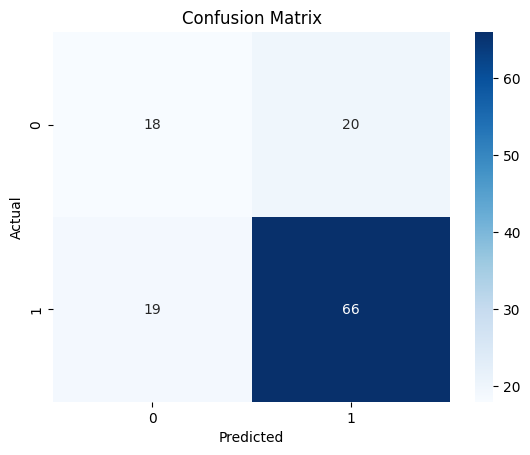

In [73]:
# Plotting a heatmap of the confusion matrix
# Visualizing the confusion matrix to better understand the model's performance
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [66]:
from sklearn.tree import DecisionTreeClassifier
classifier_2= DecisionTreeClassifier(criterion='entropy', random_state=0)

In [67]:
classifier_2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [68]:
y_pred= classifier_2.predict(x_test)

In [71]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[18, 19],
       [20, 66]])

In [70]:
dec_acc = accuracy_score(y_pred, y_test)
dec_acc

0.6829268292682927

In [69]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.47      0.49      0.48        37
           1       0.78      0.77      0.77        86

    accuracy                           0.68       123
   macro avg       0.63      0.63      0.63       123
weighted avg       0.69      0.68      0.68       123

